**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [3]:
fdiry = file.path(FD_RES, "source", "MPRA", "MPRA_LentiMPRA_K562_Nadav", "vikram230621")
fname = "LentiMPRA.K562.Library_Design.csv"
fpath = file.path(fdiry, fname)

dat = read_csv(fpath)

dat_lmpra_library = dat
print(dim(dat))
head(dat)

Rows: 243780 Columns: 7
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): name, category, chr.hg38, str.hg38, 230nt sequence (15nt 5' adaptor...
dbl (2): start.hg38, stop.hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 243780      7


name,category,chr.hg38,start.hg38,stop.hg38,str.hg38,230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor)
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
peak1,potential enhancer,chr1,115631,115831,+,AGGACCGGATCAACTGAGCCGGGTCATGAAAAAGGGGATCTTGTGTGTCTGTCCACGATAAGCACTATCACAAGGACTTTCTATAAACTCACAAGAAATTTCTGCCCACCCAGCACACAGTTTGTCCAGCTCATCCTGTAGGTGTCTCTATAATAGGACCTATCATAAAAAATTCCTCAAGACTGCAGCATTTCAGATAAGCCACCCTCACAAGACATTGCGTGAACCGA
peak1_Reversed:,potential enhancer,chr1,115631,115831,-,AGGACCGGATCAACTTCTTGTGAGGGTGGCTTATCTGAAATGCTGCAGTCTTGAGGAATTTTTTATGATAGGTCCTATTATAGAGACACCTACAGGATGAGCTGGACAAACTGTGTGCTGGGTGGGCAGAAATTTCTTGTGAGTTTATAGAAAGTCCTTGTGATAGTGCTTATCGTGGACAGACACACAAGATCCCCTTTTTCATGACCCGGCTCCATTGCGTGAACCGA
peak10,potential enhancer,chr1,634309,634509,+,AGGACCGGATCAACTTGTCGCCTTAATCCAAGCCTACGTTTTTACACTTCTAGTAAGCCTCTACCTGCACGACAACACATAATGACCCACCAATCACATGCCTATCATATAGTAAAACCCAGCCCATGGCCCCTAACAGGGGCCCTCTCAGCCCTCCTAATGACCTCCGGCCTAGCCATGTGATTTCACTTCCACTCCACAACCCTCCTCATACTCATTGCGTGAACCGA
peak10_Reversed:,potential enhancer,chr1,634309,634509,-,AGGACCGGATCAACTAGTATGAGGAGGGTTGTGGAGTGGAAGTGAAATCACATGGCTAGGCCGGAGGTCATTAGGAGGGCTGAGAGGGCCCCTGTTAGGGGCCATGGGCTGGGTTTTACTATATGATAGGCATGTGATTGGTGGGTCATTATGTGTTGTCGTGCAGGTAGAGGCTTACTAGAAGTGTAAAAACGTAGGCTTGGATTAAGGCGACACATTGCGTGAACCGA
peak100,potential enhancer,chr1,2133494,2133694,+,AGGACCGGATCAACTCCCCTCCCCAGCTGTGCGCCCGCCCCTTGGTTCCACCCCCCCCAGCTGTGCATCCGTCCCTTGGCTCCGCCCCGCACTGTGCGTCCATTTTTGACTCCGCCCCCGGCTGTGCGCTCATCCCTCGGCTCCGCCCCCGGCTGTGCGTCCGTCCCTCGGTTCCGCCCCCGGCTGCGCGTCTGTCCCTCGACTCGGCCCCTCAGCATTGCGTGAACCGA
peak100_Reversed:,potential enhancer,chr1,2133494,2133694,-,AGGACCGGATCAACTCTGAGGGGCCGAGTCGAGGGACAGACGCGCAGCCGGGGGCGGAACCGAGGGACGGACGCACAGCCGGGGGCGGAGCCGAGGGATGAGCGCACAGCCGGGGGCGGAGTCAAAAATGGACGCACAGTGCGGGGCGGAGCCAAGGGACGGATGCACAGCTGGGGGGGGTGGAACCAAGGGGCGGGCGCACAGCTGGGGAGGGGCATTGCGTGAACCGA


In [4]:
tail(dat)

name,category,chr.hg38,start.hg38,stop.hg38,str.hg38,230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor)
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
RBM38_9948,intergenic (7 loci),chr20,58380807,58381007,+,AGGACCGGATCAACTATTTCCTACACGATGTGCTCTCCTAGAAACTTGCCATGTCCCACCAGGAGGTAGAGTTTCCATCCCCACCCTTTCAAACTGTACAGGTCTCTTGACTGCCTCAAAGGATAAAATGCAGTGAGCAAGTGATCCCACATGACTTCTGAGGCTAGGTTAGAAAAGGTGATACGCCTCCATCTGGGACTCTCTCTCTTTCTCTTCATTGCGTGAACCGA
RBM38_9948_Reversed:,intergenic (7 loci),chr20,58380807,58381007,-,AGGACCGGATCAACTAAGAGAAAGAGAGAGAGTCCCAGATGGAGGCGTATCACCTTTTCTAACCTAGCCTCAGAAGTCATGTGGGATCACTTGCTCACTGCATTTTATCCTTTGAGGCAGTCAAGAGACCTGTACAGTTTGAAAGGGTGGGGATGGAAACTCTACCTCCTGGTGGGACATGGCAAGTTTCTAGGAGAGCACATCGTGTAGGAAATCATTGCGTGAACCGA
RBM38_9951,intergenic (7 loci),chr20,58381407,58381607,+,AGGACCGGATCAACTACAGTGCGGCTCAGGGTGGGGACTTGGGATCATGTGATATCAGTTGACCTGGAGACTGAAATCAGTCATGTGGGCAATCAATCAATCATACCTGCATAATAGAGCTTCAGTAAAAACTATGGACACTGAAGTTCAGGCAAGCTTCTATGGTAATACTCCATGCACTTTGTTACACACTAAGAGTCACACATCCTGTATTACATTGCGTGAACCGA
RBM38_9951_Reversed:,intergenic (7 loci),chr20,58381407,58381607,-,AGGACCGGATCAACTTAATACAGGATGTGTGACTCTTAGTGTGTAACAAAGTGCATGGAGTATTACCATAGAAGCTTGCCTGAACTTCAGTGTCCATAGTTTTTACTGAAGCTCTATTATGCAGGTATGATTGATTGATTGCCCACATGACTGATTTCAGTCTCCAGGTCAACTGATATCACATGATCCCAAGTCCCCACCCTGAGCCGCACTGTCATTGCGTGAACCGA
RBM38_9952,intergenic (7 loci),chr20,58381607,58381807,+,AGGACCGGATCAACTGTTTGTTCTCACACTGCTAATAAAGACATACCCGAGACAGGGTAATTGTAAAGGAAAGAGGTTTAGTGGACACACAGTTCTACATGGCTGGGGAGGTCTCACAGTCATGGCAGAAGATGAAGGAAGAACAAAGGGATGTCTTACATGGCAGCAGGCAAGAGAATTTGTGCAGGCAAACTTCCCTTTGTAAAACCATAAGACATTGCGTGAACCGA
RBM38_9952_Reversed:,intergenic (7 loci),chr20,58381607,58381807,-,AGGACCGGATCAACTTCTTATGGTTTTACAAAGGGAAGTTTGCCTGCACAAATTCTCTTGCCTGCTGCCATGTAAGACATCCCTTTGTTCTTCCTTCATCTTCTGCCATGACTGTGAGACCTCCCCAGCCATGTAGAACTGTGTGTCCACTAAACCTCTTTCCTTTACAATTACCCTGTCTCGGGTATGTCTTTATTAGCAGTGTGAGAACAAACCATTGCGTGAACCGA


In [6]:
fdiry = file.path(FD_RES, "source", "MPRA", "MPRA_LentiMPRA_K562_Nadav", "vikram230621")
fname = "LentiMPRA.K562.Log2FC.matrix.csv"
fpath = file.path(fdiry, fname)

dat = read_csv(fpath)

dat_lmpra_score_matrix = dat
print(dim(dat))
head(dat)

Rows: 226254 Columns: 5
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (4): replicate 1 [log2(rna/dna)], replicate 2 [log2(rna/dna)], replicate...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 226254      5


name,replicate 1 [log2(rna/dna)],replicate 2 [log2(rna/dna)],replicate 3 [log2(rna/dna)],mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
peak29573_Reversed:,-0.190,0.225,0.201,0.079
peak71109_Reversed:,0.650,0.454,0.758,0.620
ENSG00000123569,-0.762,-0.578,-0.228,-0.523
peak25742_Reversed:,-0.511,-0.644,-0.154,-0.436
peak83398,-0.154,-0.298,0.103,-0.116
peak1037_Reversed:,-0.056,0.275,0.008,0.076


In [7]:
dat = dplyr::left_join(
    dat_lmpra_score_matrix,
    dat_lmpra_library,
    by="name"
)

dat = dat %>% 
    dplyr::select(
        chr.hg38, 
        start.hg38, 
        stop.hg38, 
        name, 
        mean, 
        str.hg38, 
        category) %>%
    na.omit
colnames(dat) = c("Chrom", "Start", "End", "Name", "Score", "Strand", "Category")

dat_lmpra_arrange = dat
print(dim(dat))
head(dat)

[1] 225949      7


Chrom,Start,End,Name,Score,Strand,Category
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr16,3163448,3163648,peak29573_Reversed:,0.079,-,potential enhancer
chr6,125083195,125083395,peak71109_Reversed:,0.620,-,potential enhancer
chrX,104013573,104013773,ENSG00000123569,-0.523,-,promoter
chr14,76947662,76947862,peak25742_Reversed:,-0.436,-,potential enhancer
chr9,98271532,98271732,peak83398,-0.116,+,potential enhancer
chr1,17059727,17059927,peak1037_Reversed:,0.076,-,potential enhancer


**Explore: GATA1 promoter**

In [8]:
dat = dat_lmpra_arrange
dat = dat %>% dplyr::filter(Chrom == "chrX", End >= 48782525, Start <=48783758)
dat

Chrom,Start,End,Name,Score,Strand,Category
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chrX,48782354,48782554,GATA1_4980_Reversed:,-0.721,-,intergenic (7 loci)
chrX,48782354,48782554,GATA1_4980,-0.780,+,intergenic (7 loci)


**Explore: Distribution**

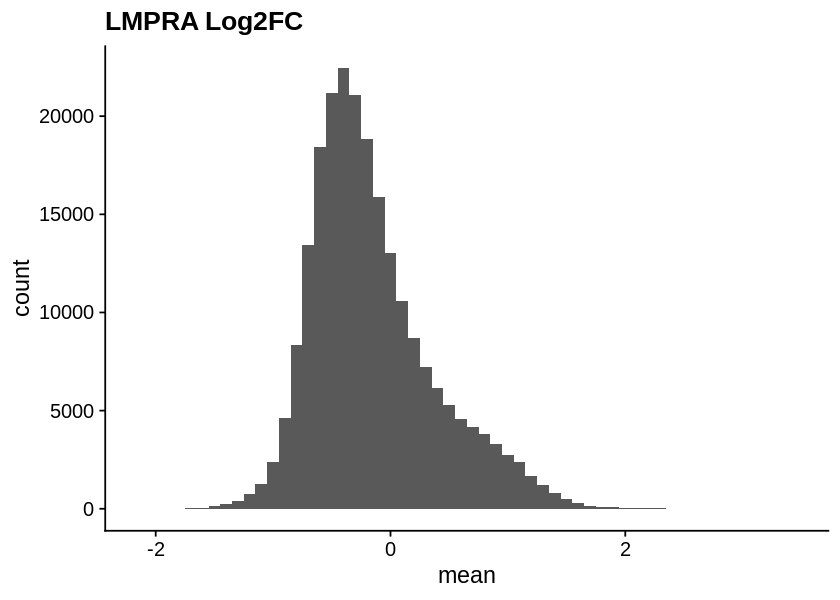

In [9]:
dat = dat_lmpra_score_matrix
gpt = ggplot(dat, aes(x=mean)) + 
    geom_histogram(binwidth = 0.1) + 
    labs(title="LMPRA Log2FC") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

In [10]:
dat = dat_lmpra_library
dat = dat %>% dplyr::filter(str_detect(name, "shuffle"))
print(table(dat$category))
head(dat)


negative control, shuffled 
                       250 


name,category,chr.hg38,start.hg38,stop.hg38,str.hg38,230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor)
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
seq10261_shuffled_0,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTACCCTGTGGGAGTTGCTGCTGGTCCGGGCACAGGGGGCAGAGTGCAACCCTCTGGCCAAGGGTATGTCCAGGAGCCGCTGTTGCAGCAAGGAGCTGCACATCCTGGTGTCTTACTGGTGAGGGTCTGGTGCCTCTGGAGCAGCTGAGACCTGTGAGAGGGCTGGGGTGAGTCGGGAAGCTCTGTCTGAACCCGCCCATGACATTGCGTGAACCGA
seq10360_shuffled_0,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTCCAATGGGAGGACAAGCAGGATGCGACTGAAATCTCATTAATTGTGGGAATGATATCTTTTTAGTGCACAGTGAGATGAGGGTAACCCATGAACAAGGCTGTGCACTTCACAATGTCTTCTGCAGTAGCCTGGAAAGTAAAGTGCACTCCCTAAAAAAATCATGCTTAGGTGCGAGCCATAGGGGATTGGGTCCAGCTCCCATTGCGTGAACCGA
seq10424_shuffled_0,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTATGATGCTGCTATTTTCTTTGAACCATAGTGTTTCAAGTGATCAACTTTAGCCAAAACTGTGGCAAAACAGCAGATTTTCTATCCTGATTACAAACACCTGCAGATGCCTACTGAAAACCTAAAGTTCCTTCTCCCTGAGATGCAACTGATAGAGCCAGCCCCAAAGCTGCCCAAATCTTAGGGAAGAGCCAAGGGTCTGCATTGCGTGAACCGA
seq10554_shuffled_0,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTGTGCTCTGATCTAACACTCTGTTGATTGTGGTTTCACTTGCTTGACTTAAGTCATCCCACTATGGCTCCACTGTTTGAATGGTGAGTAGATGTGGATTTATTGATACATACTCCTGAGGCCCACTGCCAAGCTAAGGTACGATGACATGCATGAGACCTGCAGCCTGTGATGTCAAAGTTTTGAAATTGTTTCTGATCTGCATTGCGTGAACCGA
seq10700_shuffled_0,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTAATTTGTAGCTGGCATTGTAGTTTATTGGGGTTCTAATACAGAGCCAGGCCTTGCAAAGGACTATTATTGACTGCAGAGCTTTCTTGTGCTTCCAAAAAGTTTTTTTATGCCAGTTGGGCTTACAAGCATTGTTGCTGAAGCTGTCTTGCATATTTCAAGGAAGCAGTCTAGACTGGGTTTTTTGCGTAGCATTTAGTATCATTGCGTGAACCGA
seq10713_shuffled_0,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTCCATCTAAATGAGTCTACAGTTTGCTGAAGTTTTATGTTTTAGTATAGTAATTCACATTTTTGTCCTCAGTTCTGCAGGGGACACTGGTACAAAAAACATCCAAGGAGACCCTATCAAGGATTATGTCTTTAGATAAGTTTAGTGAAACTGAAGGAGATTGACGTATCCTTTTAGGTGAAGTTGGCAGTTCCCTTGGGCTCATTGCGTGAACCGA


In [11]:
dat = dat_lmpra_score_matrix
dat = dat %>% dplyr::filter(str_detect(name, "shuffle"))
print(dim(dat))
head(dat)

[1] 247   5


name,replicate 1 [log2(rna/dna)],replicate 2 [log2(rna/dna)],replicate 3 [log2(rna/dna)],mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
seq5206_shuffled_0,-0.650,-0.182,-0.527,-0.453
seq31328_shuffled_0,-0.283,-1.050,-0.970,-0.768
seq12212_shuffled_0,-0.538,-0.747,-0.514,-0.600
seq9803_shuffled_0,-0.611,-0.907,-1.280,-0.933
seq2756_shuffled_0,-0.651,-0.219,-0.764,-0.545
seq13776_shuffled_0,-0.679,-0.904,-0.927,-0.837


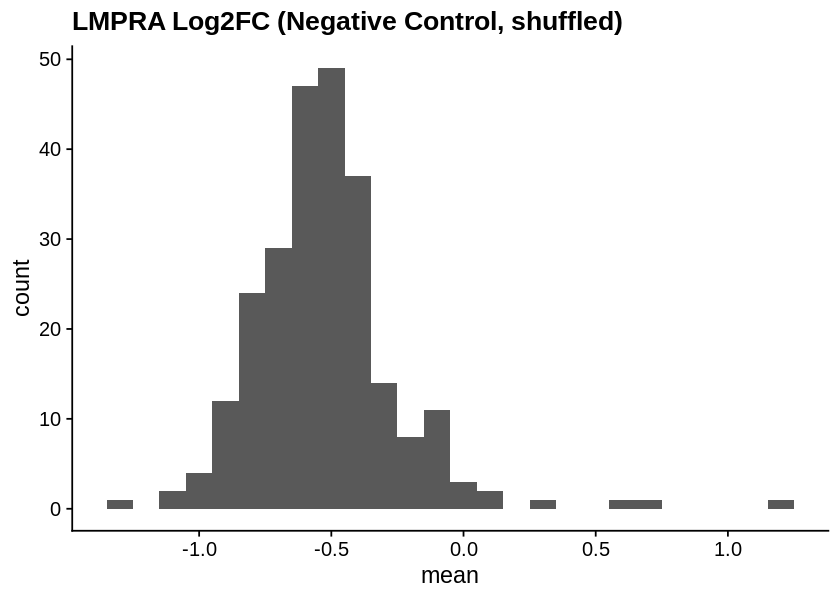

In [12]:
dat = dat_lmpra_score_matrix
dat = dat %>% dplyr::filter(str_detect(name, "shuffle"))
gpt = ggplot(dat, aes(x=mean)) + 
    geom_histogram(binwidth = 0.1) + 
    labs(title="LMPRA Log2FC (Negative Control, shuffled)") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

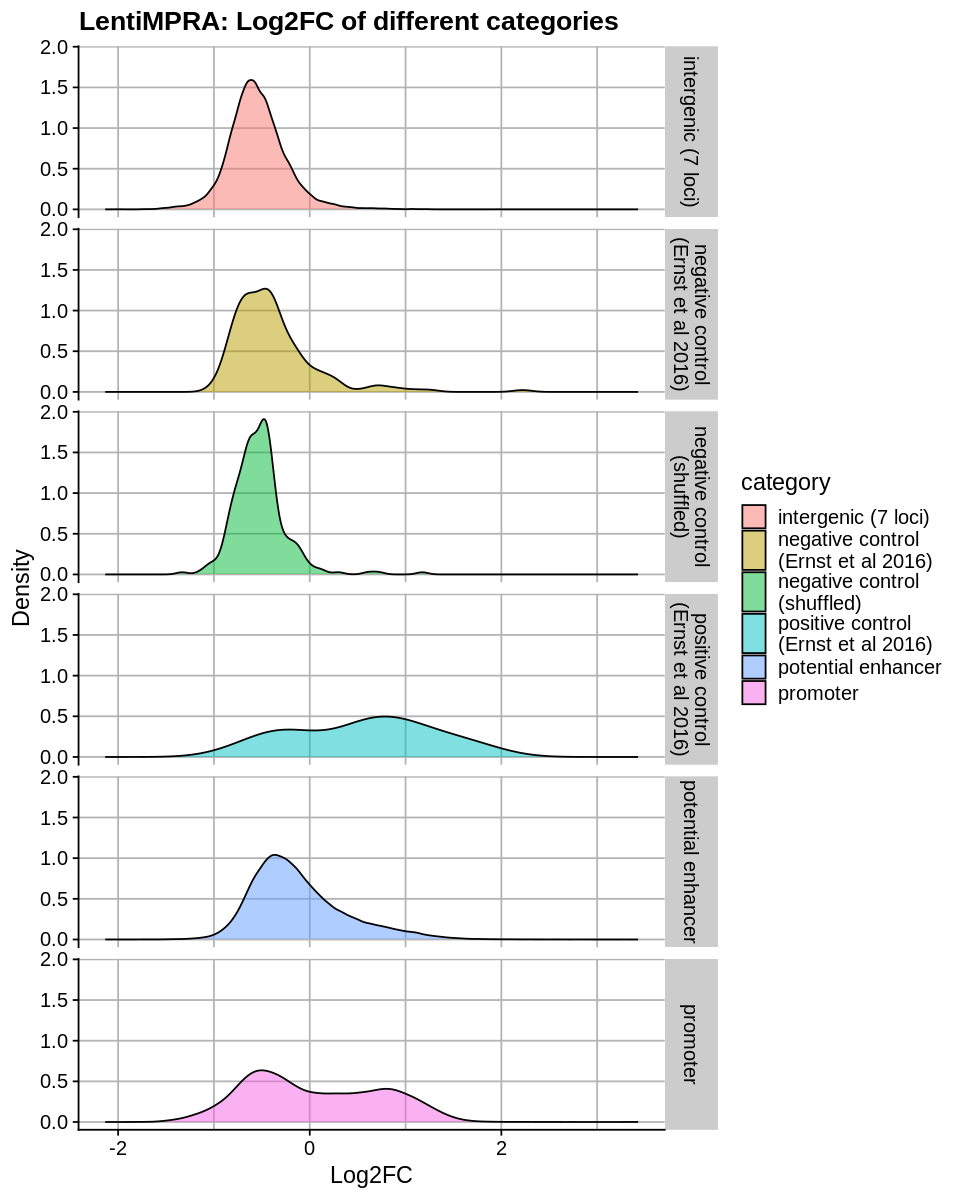

In [14]:
dat = dplyr::left_join(
    dat_lmpra_score_matrix,
    dat_lmpra_library,
    by="name")

dat = dat %>% 
    dplyr::select(name, mean, category) %>%
    dplyr::mutate(
        category = recode(
            category, 
            "negative control, shuffled" = "negative control\n(shuffled)",
            "negative control (Ernst et al 2016)" = "negative control\n(Ernst et al 2016)",
            "positive control (Ernst et al 2016)" = "positive control\n(Ernst et al 2016)"
        ))

gpt = ggplot(dat, aes(x=mean, group=category, fill=category)) +
    geom_density(alpha=0.5) +
    labs(title="LentiMPRA: Log2FC of different categories", x="Log2FC", y="Density") +
    theme_cowplot() +
    theme(
        panel.grid.major.y = element_line(color = "grey70", linewidth = 0.5, linetype = 1),
        panel.grid.major.x = element_line(color = "grey70", linewidth = 0.5, linetype = 1),
        panel.grid.minor.x = element_line(color = "grey70", linewidth = 0.5, linetype = 1)
    ) +
    facet_grid(category~.)

options(repr.plot.height=10, repr.plot.width=8)
print(gpt)

In [16]:
dat = dplyr::left_join(
    dat_lmpra_score_matrix,
    dat_lmpra_library,
    by="name")

dat_lmpra_score_full = dat
print(dim(dat))
head(dat)

[1] 226254     11


name,replicate 1 [log2(rna/dna)],replicate 2 [log2(rna/dna)],replicate 3 [log2(rna/dna)],mean,category,chr.hg38,start.hg38,stop.hg38,str.hg38,230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
peak29573_Reversed:,-0.190,0.225,0.201,0.079,potential enhancer,chr16,3163448,3163648,-,AGGACCGGATCAACTGGGTTATAATGGTTGAGCTTTAGGCTCAGAGGCCTGACACCTCGACCTGTGACCCAGGGCCCAGCAGCAGCCTCGCGGCCTGGCCGTCATCGGCCATCGGCCCAACTTCCTCTTTGTCCACAAGGGGAGCAGTCTCAGGAGTCCCTCCTGCTCCCAGCCAGGGAGTGTCATCGCAGACCTGGTCATTCTCAAAGCCTGGACATTGCGTGAACCGA
peak71109_Reversed:,0.650,0.454,0.758,0.620,potential enhancer,chr6,125083195,125083395,-,AGGACCGGATCAACTTCAGTGAACTCTTATCTTCTGAAAAGTGGCCTTGCTTGTTGGTACAGATAGGACTTCAGCTATTAACACCAAGTCTCACAAGATGGCCTGGAAGGAGGTGCAGAGTTCAAAGACAGTCCAAGCAATTCTCAGAAGAGGCGTGCTCAGAATTCTTAGGATAACTGGTTCTTAAAATATCTTCTTCCAAGAACCACAAAGGTCATTGCGTGAACCGA
ENSG00000123569,-0.762,-0.578,-0.228,-0.523,promoter,chrX,104013573,104013773,-,AGGACCGGATCAACTGATGCCACGCAACGGGACCATCCAGTCACCTTCAACGCAGGTAGGTTTGCTGAGAGGCTCCCTGCGTGACACTTCATCCAATCAGACGTGAAGCTGGCCCGAGACGTGGAGCCATGCTGCGTACCGAAGTGCCCCGGCTTCCCCGGTCCACAACCGCCATTGTCTGGTCGTGCCATCTAATGGCCACTGCCTCCGCCATGCATTGCGTGAACCGA
peak25742_Reversed:,-0.511,-0.644,-0.154,-0.436,potential enhancer,chr14,76947662,76947862,-,AGGACCGGATCAACTGCCACACTCCCCCCTTCCCATTTCTCACCCGACATGGGATCTCCACCCCCTTTCCAGCTCCATTTAGCTCTGAGTGTTTTAGGTCATTCTATGCCTGGCATTCTGCCAAGGCTTTGACAAAGACAGGAGTTTCTGCTCATTCATCCTAATGCAAGTTCCTGCGTTTATGATAATAGGGAAAAAATGCATGAAAGGGCTTGCATTGCGTGAACCGA
peak83398,-0.154,-0.298,0.103,-0.116,potential enhancer,chr9,98271532,98271732,+,AGGACCGGATCAACTGTTCCTTCAACAAGAAATAATGTCCCTTTCAAAATGTATAATGGCCATTGGCCAGAAGAGGTGGTGTGGCTTCATGATCTGCCAATGGCAAGCTCAAGGAGCTGCGTTGCTCATTTCTGTTGAGTTCCTGGGGCTCTTGCTGCAGAGCTGTGCCTTTTGTTGACCTCCTGTGCTGTTCACACGTGCTACAAATCTCAGGGCATTGCGTGAACCGA
peak1037_Reversed:,-0.056,0.275,0.008,0.076,potential enhancer,chr1,17059727,17059927,-,AGGACCGGATCAACTGGAAGAGAGTTTAGATAAGGCCTTTCTAAGGGCAGGTTGGCAAGGTCCAGTAGGGAGCCCTGGGTAGTTCTGTGAGGCAGCAGCACCCTCTGTGGGTAGACCAGAATGGCTGCAACCACCATGTTCCCACGAGCCTTAGGCGCACGCCTGCAGCCCAGCCCATCTACCTAACAGAAGAGGCTGACCTACTTGCTGGGTGACATTGCGTGAACCGA


In [17]:
dat = dat_lmpra_score_full
lst = split(dat, dat$category)
dat = lst[["negative control, shuffled"]]

dat_lmpra_score_negative_shuffled = dat
print(dim(dat))
head(dat)

[1] 247  11


name,replicate 1 [log2(rna/dna)],replicate 2 [log2(rna/dna)],replicate 3 [log2(rna/dna)],mean,category,chr.hg38,start.hg38,stop.hg38,str.hg38,230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
seq5206_shuffled_0,-0.650,-0.182,-0.527,-0.453,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTTCATCATAATGCTAGTATGGCAATGGATAAGGGGTCAACGTGCGGTGTTTTTTTCTCTACACTGTGTAGGGTGAAGTACTGGAGAAGAATTCTTGAGATGTTAGGTGGATTTTTTCTCACCTCTCTTTCTTTTAGCAGCCAACTATCTTGTAACTTTTTGAAATACACATTCTTGATGCTTCTCTGGTGGTAAGCTTATCCATTGCGTGAACCGA
seq31328_shuffled_0,-0.283,-1.050,-0.970,-0.768,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTGTATAAGCACCTGAAGAAATGCCAAAGCTTCCCTACATAGAACTCTTCAGCTAGGGATCCCAATTGAGCCAGGTGGATAACTTAAACTACGCACTCTCCTCACCCATCCAGGGGCTGGGTCAACTCACACAGAACCTTTTGGCCTAACTTACCCACCACTCAGACAACAGCCAAGGGCAGATCTGCAGGTGCTCATTGTACATTGCGTGAACCGA
seq12212_shuffled_0,-0.538,-0.747,-0.514,-0.600,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTCAGTGCTTCCATCAGAGAACACTTCATTTAAGGCATCTTACCCCTCATCTAAAAGGGCTCTGCCAAATGTTCCGCACAAGTAAGAAGTCGATTGGCTCCCTCTCACAAAATTCTTACTCACCTTGTGCAAATGCTCTGCCCCCCTCATCATTCCTCCTTACAAGAGCCCTAACTCTCTTCTACATCCACCCATCAACACCCATTGCGTGAACCGA
seq9803_shuffled_0,-0.611,-0.907,-1.280,-0.933,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTTATCCTTTTACTTTACATGGCTGAAAGTCGATTAAGCTTCGGTCAACACTAAGTACATAAAGTGATGAGATCCTGTGCATGTTGCTATTTAAGAGGAGTCTTTTTGAGAAGAGGGTCTTATTGTAGGCTTAGGGTCTGTCTACTAGGTCAAGGCTTGACTGAGGGCAAGAGCAATAAACTGGCTGTTTATGAGTAGCGAGCATTGCGTGAACCGA
seq2756_shuffled_0,-0.651,-0.219,-0.764,-0.545,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTGAATAATCCCCCTGAGCATTTGTACATCTCCAACAAGTTACAGAGGGAGCAGATCTAAGATTTCAGTTTGTATTAAGAGAGCTCTGAATGCCTCAGTAGGAGGGTGGGTGTGAGAGCACAGGAGCTATAGGACCATGGAAGTTGACTGCACTTGTATACTAAATGATATCCTGGGTCAGTCAGTGGAAGAATTCTTCTTACATTGCGTGAACCGA
seq13776_shuffled_0,-0.679,-0.904,-0.927,-0.837,"negative control, shuffled",NA,NA,NA,NA,AGGACCGGATCAACTAAACCAGCAGTTCACTATGTTCATCAATTTTACTCATTCCCTTCATTTTTAACCAGAGATCATCAACCTAAACCCCCATATAAACCTTCAACTAAAATGTTGGACCTCTCATATAACCAATACCAAAGATTACATCAGAGCTTTAATTTTCACAGCCAAATGCCCTATTTACCACTCCTTTTGGTAGTCATATGTTGACTCATTGCGTGAACCGA


In [18]:
dat = dat_lmpra_score_negative_shuffled
vec = dat$mean
val_mu = mean(vec)
val_sd = sd(vec)

print(val_mu)
print(val_sd)

[1] -0.5249433
[1] 0.2754342


In [21]:
dat = dat_lmpra_score_full
table(dat$category)


                intergenic (7 loci) negative control (Ernst et al 2016) 
                              27145                                 185 
         negative control, shuffled positive control (Ernst et al 2016) 
                                247                                  41 
                 potential enhancer                            promoter 
                             169260                               29376 

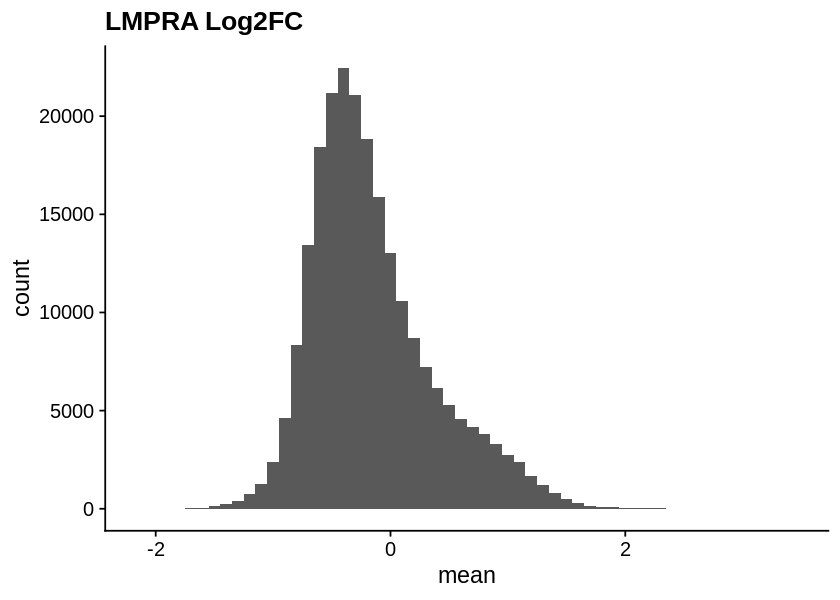

In [19]:
dat = dat_lmpra_score_full
gpt = ggplot(dat, aes(x=mean)) + 
    geom_histogram(binwidth = 0.1) + 
    labs(title="LMPRA Log2FC") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

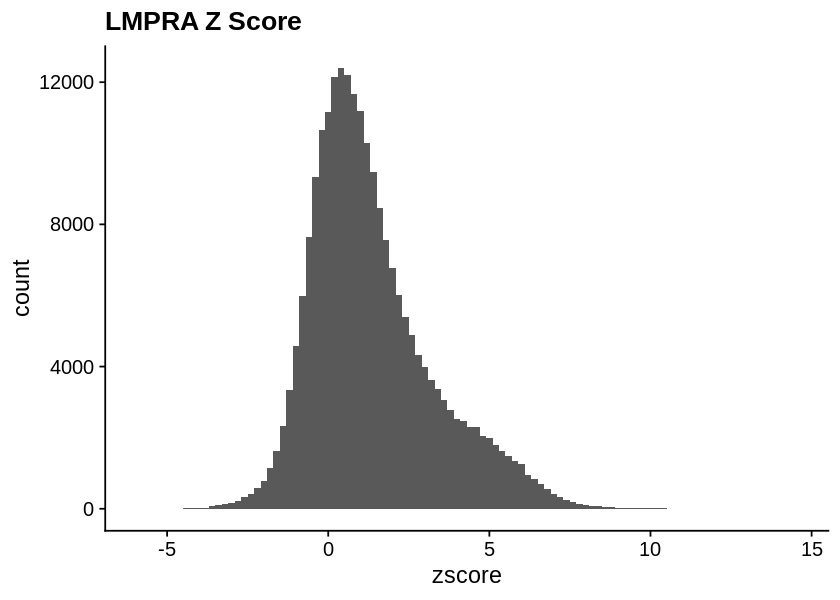

In [20]:
dat = dat_lmpra_score_full
dat = dat %>% dplyr::mutate(zscore = (mean - val_mu) / val_sd)

gpt = ggplot(dat, aes(x=zscore)) + 
    geom_histogram(binwidth = 0.2) + 
    labs(title="LMPRA Z Score") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

[1] 225781     11


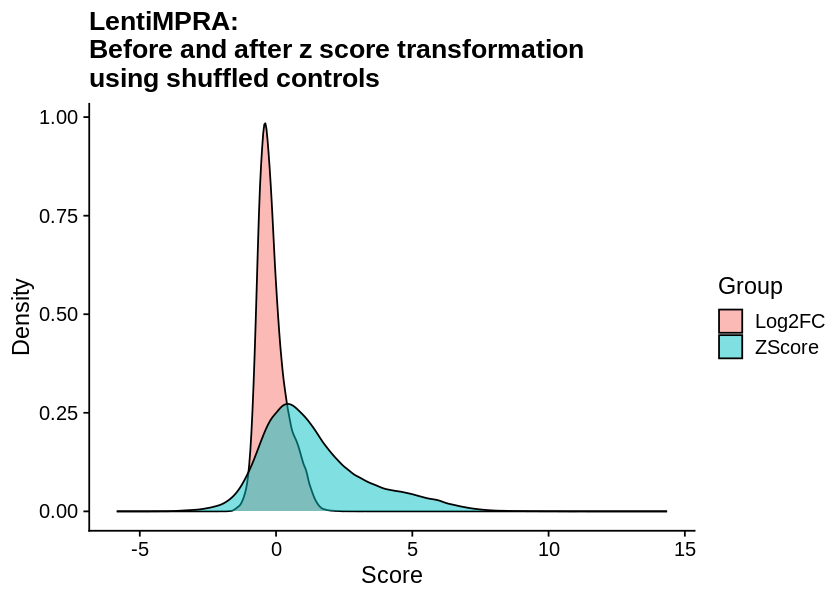

In [25]:
dat = dat_lmpra_score_full
vec = c("potential enhancer", "promoter", "intergenic (7 loci)")

dat = dat %>% dplyr::filter(category %in% vec)
print(dim(dat))
dat = dat %>% dplyr::mutate(zscore = (mean - val_mu) / val_sd)
dat = dat %>% dplyr::select(mean, zscore)
colnames(dat) = c("Log2FC", "ZScore")
dat = dat %>% tidyr::gather(Group, Score)

gpt = ggplot(dat, aes(x=Score, fill=Group)) + 
    geom_density(alpha=0.5) + 
    labs(
        y="Density",
        title="LentiMPRA:\nBefore and after z score transformation\nusing shuffled controls") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)